In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV

In [2]:
# 住宅価格データセットのダウンロード
boston = load_boston()
X = boston.data
y = boston.target

# 特徴量と正解を訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：',X_train.shape,' y_trainの形状：',y_train.shape,' X_testの形状：',X_test.shape,' y_testの形状：',y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [0]:
# 特徴量の標準化
sc = StandardScaler()
# 訓練データを変換器で標準化
X_train_std = sc.fit_transform(X_train)
# テストデータを作成した変換器で標準化
X_test_std = sc.transform(X_test)

In [4]:
# グリッドサーチの実行
param_grid = [
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], 
         'epsilon': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
        }
    ]

model = SVR()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_std, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:   27.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'epsilon': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [5]:
-(grid_search.best_score_)

10.42898837571524

In [6]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 300.0, 'epsilon': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
SVR(C=300.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma=0.03,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [7]:
# グリッドサーチの最良モデルで予測
model_grs = grid_search.best_estimator_
y_train_grs_pred = model_grs.predict(X_train_std)
y_test_grs_pred = model_grs.predict(X_test_std)

# MSEの計算
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_grs_pred),
        mean_squared_error(y_test, y_test_grs_pred)))

MSE train: 3.13, test: 18.10


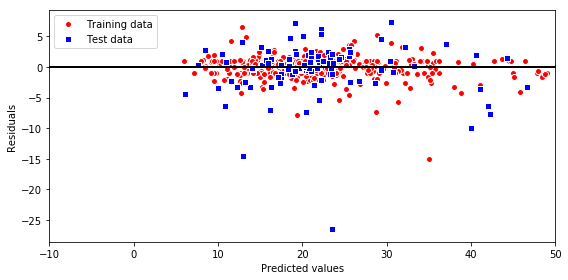

In [0]:
# 残差プロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定

plt.scatter(y_train_grs_pred,  y_train_grs_pred - y_train,
            c='red', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_grs_pred,  y_test_grs_pred - y_test,
            c='blue', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()